In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1=pd.read_csv('heart.csv')

In [3]:
df2=pd.read_csv("titanic.csv")

In [4]:
df1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
df1.shape

(918, 12)

In [6]:
df1.size

11016

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [8]:
df1.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [9]:
df1.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [10]:
num_variables=[col for col in df1.columns if df1[col].dtype !="O"]

In [11]:
num_variables

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'HeartDisease']

In [12]:
cat_variables=[col for col in df1.columns if df1[col].dtype =="O"]

In [13]:
cat_variables

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

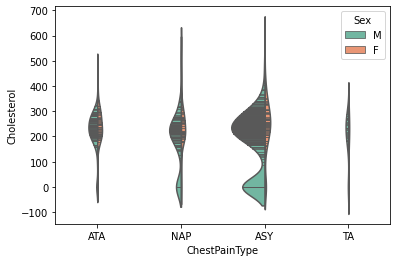

In [14]:
ax =sns.violinplot(x="ChestPainType",y="Cholesterol",hue="Sex",data=df1,palette="Set2",split=True,scale="count",inner="stick",scale_hue=False)

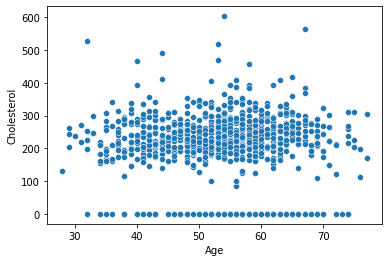

In [15]:
sns.scatterplot(x=df1["Age"],y=df1["Cholesterol"])

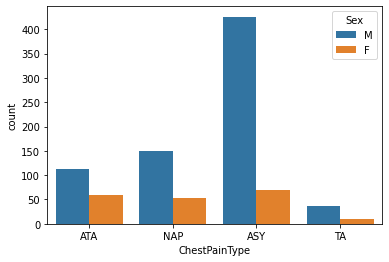

In [16]:
sns.countplot(x="ChestPainType",data=df1,hue="Sex")

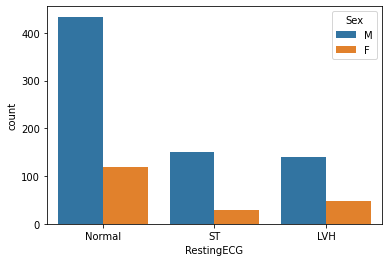

In [17]:
sns.countplot(x="RestingECG",data=df1,hue="Sex")

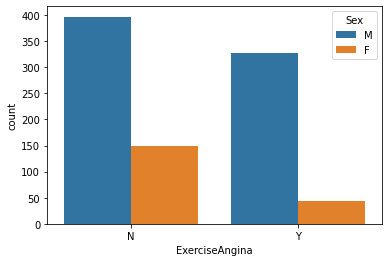

In [18]:
sns.countplot(x="ExerciseAngina",data=df1,hue="Sex")

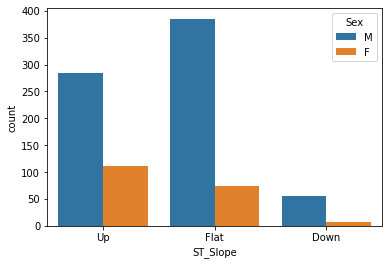

In [19]:
sns.countplot(x="ST_Slope",data=df1,hue="Sex")

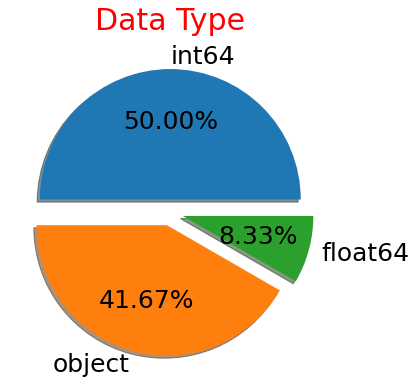

In [20]:
import matplotlib 
plt.figure(figsize=(6, 6))
matplotlib.rcParams.update({'font.size': 25})

df1.dtypes.value_counts().plot.pie(explode=[0.1, 0.1, 0.1],
                                       autopct='%1.2f%%',
                                       shadow=True)
plt.title('Data Type',color='Red',pad=20);
plt.axis('off');

In [21]:
df1.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

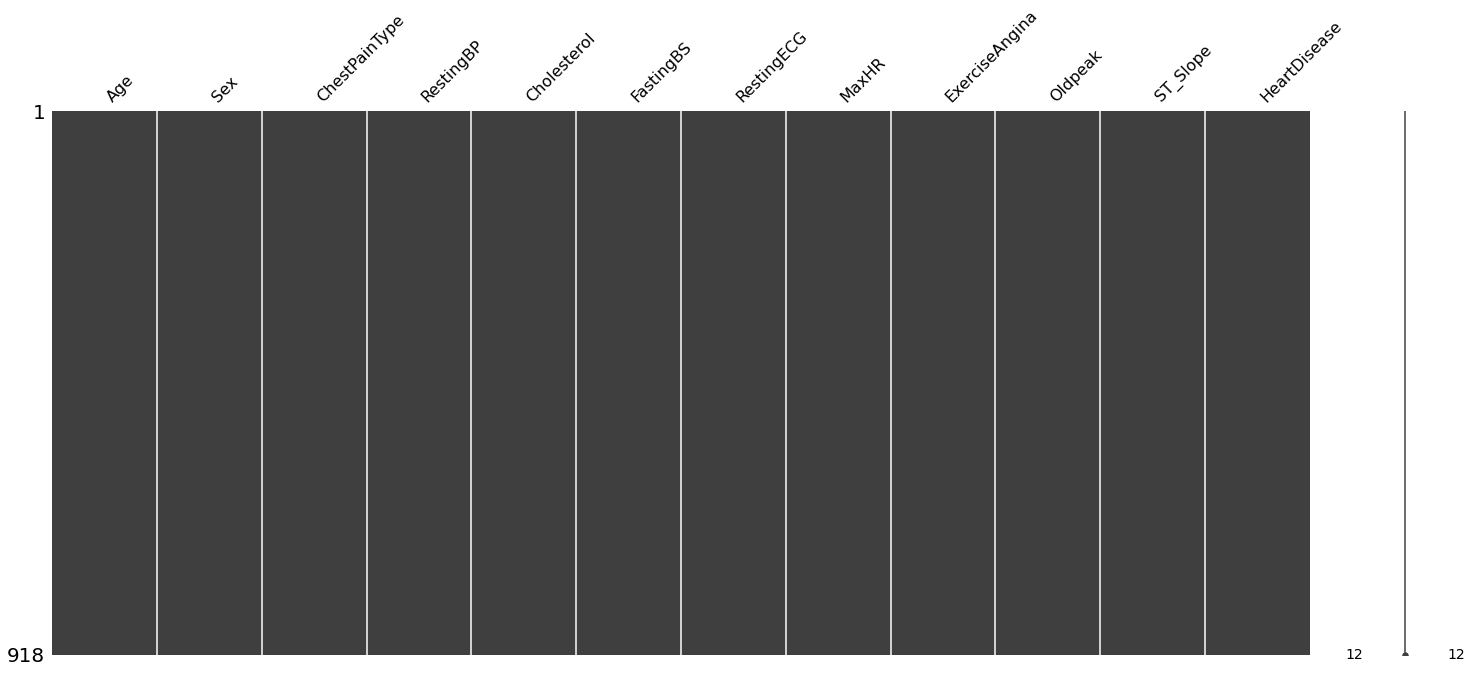

In [22]:
import missingno as msno
msno.matrix(df1)
plt.show()

In [23]:
print(f"We have {df1.shape[0]} instances with the {df1.shape[1]-1}features and 1 output variable")

We have 918 instances with the 11features and 1 output variable


In [24]:
corr=df1.corr()

In [25]:
corr

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


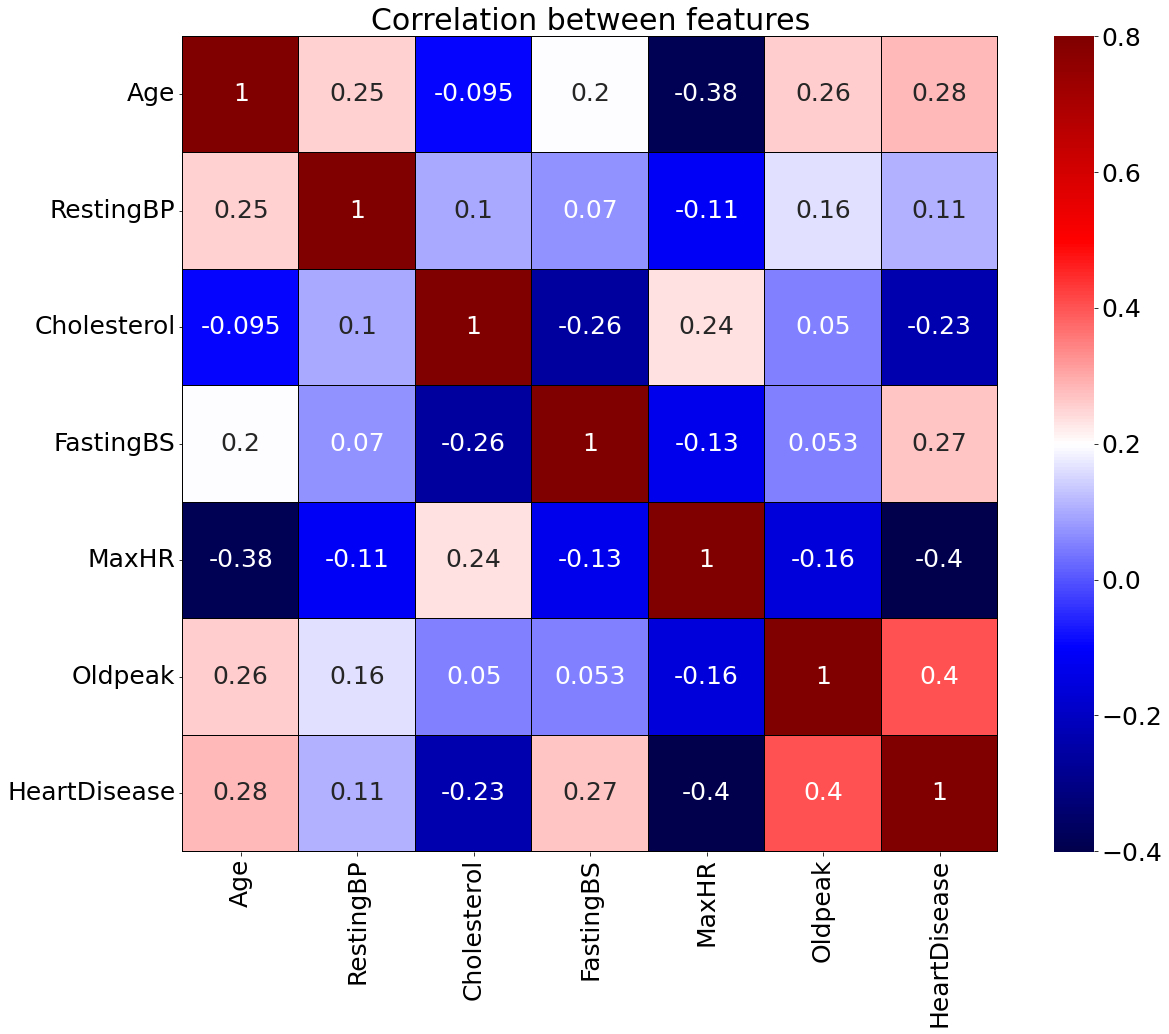

In [26]:

plt.figure(figsize=(20, 15))
sns.heatmap(corr, vmax=.8, linewidths=0.01,annot=True, square=True,cmap='seismic',linecolor="black")
plt.title('Correlation between features')
plt.show()

In [27]:
# One Hot Encoding

In [28]:
df1['RestingECG'].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

The Python library Pandas provides a function called get_dummies to enable one-hot encoding.

In [29]:
df=df1.copy()

In [30]:
x=df.drop(columns="HeartDisease",axis=1)

In [31]:
y=df["HeartDisease"]

In [32]:
x['RestingECG'].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [33]:
x=pd.get_dummies(x,columns=["RestingECG"])
x.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,RestingECG_LVH,RestingECG_Normal,RestingECG_ST
0,40,M,ATA,140,289,0,172,N,0.0,Up,0,1,0
1,49,F,NAP,160,180,0,156,N,1.0,Flat,0,1,0
2,37,M,ATA,130,283,0,98,N,0.0,Up,0,0,1
3,48,F,ASY,138,214,0,108,Y,1.5,Flat,0,1,0
4,54,M,NAP,150,195,0,122,N,0.0,Up,0,1,0


In [34]:
x=pd.get_dummies(x,drop_first=True)
x.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,0,1,1,0,0,0,0,1
1,49,160,180,0,156,1.0,0,1,0,0,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,1,1,0,0,0,0,1
3,48,138,214,0,108,1.5,0,1,0,0,0,0,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


In [35]:
# One hot encoding with Sklearn (LabelEncoder)

In [36]:
X = df.drop(columns="HeartDisease" , axis=1)
Y = df["HeartDisease"]

X["RestingECG"].value_counts()




from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
X['RestingECG']=encoder.fit_transform(X['RestingECG'])
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,1,172,N,0.0,Up
1,49,F,NAP,160,180,0,1,156,N,1.0,Flat
2,37,M,ATA,130,283,0,2,98,N,0.0,Up
3,48,F,ASY,138,214,0,1,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,1,122,N,0.0,Up


In [37]:
X["RestingECG"].value_counts()

1    552
0    188
2    178
Name: RestingECG, dtype: int64

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
encoder=LabelEncoder()

In [40]:
for col in cat_variables:
  df[col]=encoder.fit_transform(df[col])

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [41]:
# One hot encoding with Sklearn (OneHotEncoder)

In [42]:
heart_3=df1.copy()

In [43]:
X=heart_3.drop(columns="HeartDisease",axis=1)
Y=heart_3["HeartDisease"]
X["RestingECG"].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [44]:
from sklearn.preprocessing import OneHotEncoder

In [45]:
ohe=OneHotEncoder(handle_unknown='ignore')

In [46]:
X=pd.DataFrame(ohe.fit_transform(X[["RestingECG"]]).toarray())

In [47]:
X.head()

,0,1,2
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0


In [48]:
X=pd.concat([heart_3,X],axis=1).drop('RestingECG',axis=1)

In [49]:
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,0,1,2
0,40,M,ATA,140,289,0,172,N,0.0,Up,0,0.0,1.0,0.0
1,49,F,NAP,160,180,0,156,N,1.0,Flat,1,0.0,1.0,0.0
2,37,M,ATA,130,283,0,98,N,0.0,Up,0,0.0,0.0,1.0
3,48,F,ASY,138,214,0,108,Y,1.5,Flat,1,0.0,1.0,0.0
4,54,M,NAP,150,195,0,122,N,0.0,Up,0,0.0,1.0,0.0


In [50]:
# Ordinal Encoding

In [51]:
heart_4=df.copy()

In [52]:
x=heart_4.drop(columns="HeartDisease",axis=1)
y=heart_4['HeartDisease']
x["RestingECG"].value_counts()

1    552
0    188
2    178
Name: RestingECG, dtype: int64

In [53]:
!pip install category_encoders
import category_encoders as ce
encoder=ce.OrdinalEncoder(cols=['RestingECG'])
x=encoder.fit_transform(x)
x.head()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2


In [54]:
x['RestingECG'].value_counts()

1    552
3    188
2    178
Name: RestingECG, dtype: int64

In [55]:
# Replace Method

In [56]:
heart_5 = df.copy()

In [57]:
X = heart_5.drop(columns="HeartDisease" , axis=1)
Y = heart_5["HeartDisease"]

X["RestingECG"].value_counts()

1    552
0    188
2    178
Name: RestingECG, dtype: int64

In [58]:
X["RestingECG"].replace({"Normal":0,"LVH":1,"ST":2},inplace=True)

In [59]:
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2


In [60]:
X["RestingECG"].value_counts()

1    552
0    188
2    178
Name: RestingECG, dtype: int64

In [61]:
# Model Building

In [62]:
X=df.drop(columns="HeartDisease",axis=1)
y=df["HeartDisease"]

In [63]:
X=pd.get_dummies(X,drop_first=True)
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2


In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=21)

In [66]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [67]:
import xgboost as Xgb

In [68]:
xgb=Xgb.XGBClassifier()

In [69]:
xgb.fit(X_train,y_train)

XGBClassifier()

In [70]:
y_pred=xgb.predict(X_test)

In [72]:
print("classification_report:",classification_report(y_test,y_pred))

classification_report:               precision    recall  f1-score   support

           0       0.88      0.86      0.87        76
           1       0.90      0.92      0.91       108

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184

